In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns
import numpy as np # linear algebra
import os
import re
import nltk

In [2]:
import pandas as pd
train=pd.read_csv('fake-news-data/train.csv')
test=pd.read_csv('fake-news-data/test.csv')  #import data

In [3]:
print(train.shape, test.shape) #shape of data 20800 samples in train, 5200 samples in test

(20800, 5) (5200, 4)


In [4]:
train.head() #show the top 5 rows of train data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
train['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [6]:
test.head() #show the top 5 values of test data

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [7]:
print(train.isnull().sum()) #check the null values in train data
print("\n")
print(test.isnull().sum())  #check the null values in test data

id           0
title      558
author    1957
text        39
label        0
dtype: int64


id          0
title     122
author    503
text        7
dtype: int64


In [8]:
test=test.fillna(' ')
train=train.fillna(' ') #replace missing value with a space
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text'] #merge all columns in one

In [12]:
from wordcloud import WordCloud, STOPWORDS
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS)

#iterate through the csv file
for val in train[train['label']==1].total:
    
    #split the value
    tokens = val.split()
    
    #converts each tokens into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total:
    
    #split the value
    tokens = val.split()
    
    #converts each tokens into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    fake_words += " ".join(tokens)+" "

KeyboardInterrupt: 

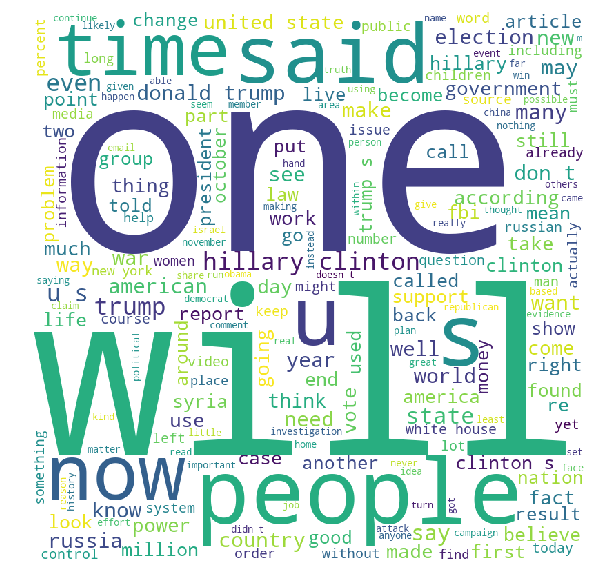

In [10]:
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(real_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

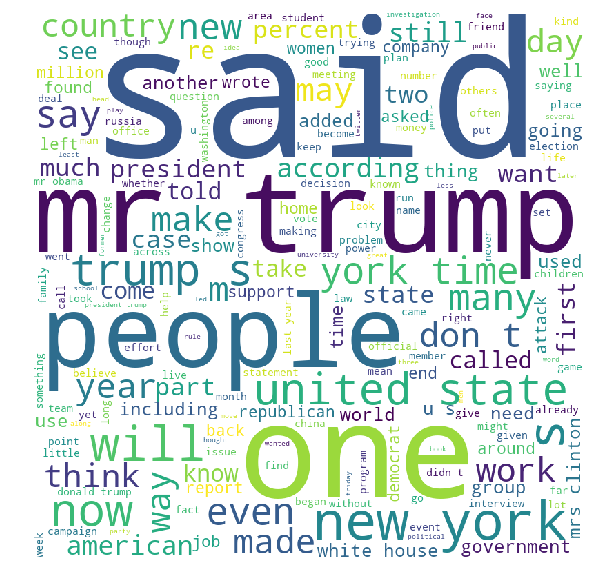

In [11]:
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(fake_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [13]:
# cleaning and Preprocessing #Regex #remove punctuation form the string real life example in html form
import re
s= "!</> hello please$$ </>^c!!!!o%%m&&&%e@@@^^^^</> i%^@@@n"

In [14]:
s = re.sub(r'[^\w\s]','',s) #if any substring does not hold words or space replace it with the empty string

In [15]:
print(s)

 hello please come in


In [16]:
# tokenization nltk library break sentence into words
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
nltk.word_tokenize("hello my name is varun hello")

['hello', 'my', 'name', 'is', 'varun', 'hello']

In [18]:
#stopwords removing

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
sentence = "Covid-19 pandemic has impacted many countries and what it did to economy is very stressful"

In [20]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words] #remove stop words present in above sentence

In [21]:
words  #print words by removing stopwords

['Covid-19',
 'pandemic',
 'impacted',
 'many',
 'countries',
 'economy',
 'stressful']

In [22]:
#lemmatization: get your word to the root word reducing all words into dictionary form ex: studies -> study

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str="been had done languages cities nice plays studies mice. I wear a ring"

In [23]:
#tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#lemmetize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
nice
play
study
mouse
.
I
wear
a
ring


In [24]:
#applying on dataset

lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words] #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() #lemetization
        
    train.loc[index,'total'] = filter_sentence

In [25]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didnt even see comeys lette...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitb...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why truth might get you fired consortiumnewsc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike ha...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished st...


In [27]:
d=train[['total','label']]

In [28]:
d.head()

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


In [73]:
train = train[['total','label']]

In [13]:
# Applying NLP Techniques

from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
X_train = train['total']
Y_train = train['label']

In [18]:
corpus = [
    'This is first document',
    'This document is the second document',
    'And this is the third one',
    'Is this the first document'
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [19]:
print(X.toarray())

[[0 1 1 1 0 0 0 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [28]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer(stop_words='english',
                                decode_error='strict',
                                analyzer='word',
                                ngram_range=(1, 2),
                                max_features=max_features)
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [29]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30) #30=max features

In [30]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

In [35]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [40]:
tf_idf_matrix

<20800x191484 sparse matrix of type '<class 'numpy.float64'>'
	with 6953788 stored elements in Compressed Sparse Row format>

In [41]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train,random_state=0)

In [46]:
print(X_train.shape,X_test.shape)

(15600, 191484) (5200, 191484)
